### Import pakietów

In [29]:
import pandas as pd
import numpy as np
import math
from scipy.stats import norm
from scipy.optimize import minimize
from matplotlib import pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
from sklearn.preprocessing import StandardScaler

### Wczytanie danych wejściowych

In [30]:
data = pd.read_excel('./data/Boston505.xlsx')
test = pd.read_excel('./data/Boston506.xlsx')

In [31]:
data_x = data.drop(columns=['CMEDV'])
data_y = data['CMEDV']

In [32]:
sc=StandardScaler()
data_x_transformed = sc.fit_transform(data_x)
data_x_transformed = pd.DataFrame(data_x_transformed, index=data_x_transformed[:,0])
data_x_transformed.columns = data_x.columns

In [33]:
x = data_x_transformed
y = data_y

### Regresja MNK

In [34]:
model_LR = LinearRegression()

In [35]:
model_LR.fit(x,y)

,fit_intercept,True
,copy_X,True
,tol,1e-06
,n_jobs,None
,positive,False


In [36]:
model_LR.coef_

array([-0.91395064,  1.1124291 ,  0.15566962,  0.68338672, -2.053749  ,
        2.65999165,  0.01500072, -3.16411107,  2.64041201, -2.1373381 ,
       -1.99876015,  0.84297195, -3.78931386])

In [37]:
model_LR.intercept_

np.float64(22.537227722772272)

In [38]:
coefs = []
for i in range(len(model_LR.coef_)):
    name = x.columns[i]
    coef = model_LR.coef_[i]
    coefs.append(f"{coef:.4} * {name}")

In [39]:
print("Oszacowana liniowa funkcja regresji:")
print("y = ",model_LR.intercept_, " + ", " + ".join(coefs))

Oszacowana liniowa funkcja regresji:
y =  22.537227722772272  +  -0.914 * CRIM + 1.112 * ZN + 0.1557 * INDUS + 0.6834 * CHAS + -2.054 * NOX + 2.66 * RM + 0.015 * AGE + -3.164 * DIS + 2.64 * RAD + -2.137 * TAX + -1.999 * PTRATIO + 0.843 * B + -3.789 * LSTAT


In [40]:
r_2 = r2_score(y, model_LR.predict(x))
print(f"Współczynnik determinacji R^2: {r_2:.0%}")

Współczynnik determinacji R^2: 74%


In [41]:
predictions = model_LR.predict(test)
predictions

array([-547.16952559])

### Regresja liniowa Metoda gradientowa

In [42]:
def loss(y,y_predicted):
    n=len(y)
    s=0
    for i in range(n):
        s+=(y[i]-y_predicted[i])**2
    return (1/n)*s

In [43]:
def predicted_y(weight,x,intercept):
    y_lst=[]
    for i in range(len(x)):
        y_lst.append(weight@x[i]+intercept) #dot product btween weight and input
    return np.array(y_lst)

In [44]:
#derivative of loss w.r.t weight
def dldw(x,y,y_predicted):
    s=0
    n=len(y)
    for i in range(n):
        s+=-x[i]*(y[i]-y_predicted[i])
    return (2/n)*s

In [45]:
weight_vector=np.random.rand(data_x.shape[1])
intercept=0
learning_rate=0.001

In [46]:
# derivative of loss w.r.t bias
def dldb(y,y_predicted):
    n=len(y)
    s=0
    for i in range(len(y)):
        s+=-(y[i]-y_predicted[i])
    return (2/n) * s

In [47]:
def gradient_descent(x, y):
    weight_vector = np.random.randn(x.shape[1])
    intercept = 0
    epoch = 2000
    n = len(x)
    linear_loss = []
    learning_rate = 0.001
    for i in range(epoch):
        y_predicted = predicted_y(weight_vector, x, intercept)
        weight_vector = weight_vector - learning_rate * dldw(x, y, y_predicted)
        intercept = intercept - learning_rate * dldb(y, y_predicted) # Uwaga: dldb nie jest zdefiniowane na obrazkach
        linear_loss.append(loss(y, y_predicted))
    plt.plot(np.arange(1, epoch), linear_loss[1:])
    plt.xlabel("number of epoch")
    plt.ylabel("loss")

    return weight_vector, intercept 

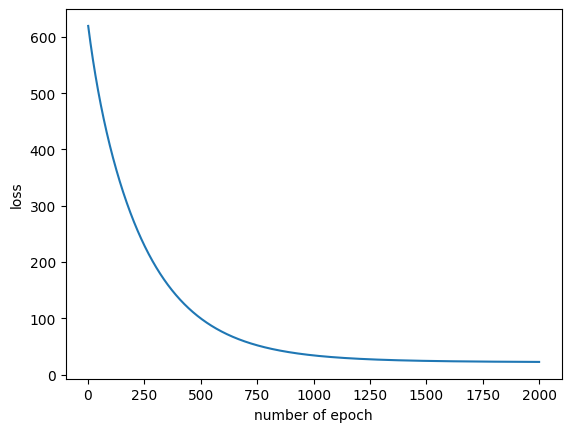

In [48]:
w, b = gradient_descent(np.array(x), y)

In [49]:
coefs = []
for i in range(len(weight_vector)):
    x = data_x.columns[i]
    coef = weight_vector[i]
    coefs.append(f"{coef:.4} * {x}")

In [50]:
print("Oszacowana liniowa funkcja regresji:")
print("y =", intercept, " + ", " + ".join(coefs))

Oszacowana liniowa funkcja regresji:
y = 0  +  0.8188 * CRIM + 0.1372 * ZN + 0.8121 * INDUS + 0.8857 * CHAS + 0.3422 * NOX + 0.7046 * RM + 0.8053 * AGE + 0.5345 * DIS + 0.2407 * RAD + 0.6957 * TAX + 0.7169 * PTRATIO + 0.1265 * B + 0.2562 * LSTAT


### Regresja liniowa MNW

In [51]:
x = data_x
y = data_y
t = test

In [59]:
def nll(params, my_df):
    params = params.tolist()
    intercept = params.pop(0)
    sigma = params.pop()
    coefs = params
    y_teor = intercept + my_df.dot(coefs)
    y_obs = data_y

    return -np.sum(norm.logpdf(y_teor - y_obs, loc=0, scale=sigma))


In [53]:
data_x.shape[1]

13

In [60]:
initials = [1] * (data_x.shape[1] + 1)
initials.append(0.25)  # initial sigma value

In [61]:
res = minimize(nll, x0=initials, args = (data_x), method='Nelder-Mead')
intercept = res.x[0]
params = res.x[1:-1]
sigma = res.x[-1]

In [62]:
coefs = []
for i in range(len(params)):
    name = x.columns[i]
    coef = params[i]
    coefs.append(f"{coef:.4} * {name}")

In [63]:
print("Oszacowana liniowa funkcja regresji:")
print("y =", intercept, " + ", " + ".join(coefs))

Oszacowana liniowa funkcja regresji:
y = 5.981759053469953  +  -1.568 * CRIM + 0.7402 * ZN + 2.46 * INDUS + 4.927 * CHAS + -3.117 * NOX + -1.952 * RM + -0.1542 * AGE + -4.532 * DIS + 0.1624 * RAD + -0.03333 * TAX + 0.7461 * PTRATIO + 0.05595 * B + 0.458 * LSTAT


In [58]:
r_2 = r2_score(y, predicted_y(w, np.array(x), b))
print(f"Współczynnik determinacji R^2: {r_2:.0%}")

Współczynnik determinacji R^2: -589425%
